In [72]:
import pandas as pd 
import numpy as np
import math
from sklearn import feature_extraction
from sklearn import svm
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [73]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

from nltk.stem import WordNetLemmatizer
lemmer=WordNetLemmatizer()

def load_file(filename):
    file = open(filename, 'r', encoding='UTF-8', newline='')
    X = []
    y = []
    for line in file:
        split = line.split('\t')
        label = split[1]
        #review = preprocess(split[0])
        review = tokenizer.tokenize(split[0])
        review = [x.lower() for x in review]
        review = [lemmer.lemmatize(x) for x in review]
        review = " ".join(review)
        X.append(review)
        y.append(label)
    return X,y

In [89]:
X_train, y_train = load_file("IMDB-train.txt")
X_dev, y_dev = load_file("IMDB-valid.txt")
X_test, y_test = load_file("IMDB-test.txt")

In [90]:
y_final_train = np.array(y_train + y_dev)
X_final_train = np.array([row for row in X_train] + [row for row in X_dev])

In [91]:
vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range = (1,1), binary = False, sublinear_tf = True)
#vectorizer = feature_extraction.text.CountVectorizer(ngram_range = (1,1), binary = False)
vectorizer.fit(X_train + X_dev + X_test)
X_train = vectorizer.transform(X_train)
X_dev = vectorizer.transform(X_dev)
X_test = vectorizer.transform(X_test)
X_final_train = vectorizer.transform(X_final_train)

Score: 0.7591 Current_Best: 0.7591 Left: 300
Score: 0.8326 Current_Best: 0.8326 Left: 299
Score: 0.8391 Current_Best: 0.8391 Left: 298
Score: 0.8444 Current_Best: 0.8444 Left: 297
Score: 0.8483 Current_Best: 0.8483 Left: 296
Score: 0.8519 Current_Best: 0.8519 Left: 295
Score: 0.8542 Current_Best: 0.8542 Left: 294
Score: 0.8563 Current_Best: 0.8563 Left: 293
Score: 0.8591 Current_Best: 0.8591 Left: 292
Score: 0.8606 Current_Best: 0.8606 Left: 291
Score: 0.8628 Current_Best: 0.8628 Left: 290
Score: 0.8656 Current_Best: 0.8656 Left: 289
Score: 0.8671 Current_Best: 0.8671 Left: 288
Score: 0.8674 Current_Best: 0.8674 Left: 287
Score: 0.8688 Current_Best: 0.8688 Left: 286
Score: 0.8694 Current_Best: 0.8694 Left: 285
Score: 0.8704 Current_Best: 0.8704 Left: 284
Score: 0.8709 Current_Best: 0.8709 Left: 283
Score: 0.8717 Current_Best: 0.8717 Left: 282
Score: 0.8728 Current_Best: 0.8728 Left: 281
Score: 0.8735 Current_Best: 0.8735 Left: 280
Score: 0.8737 Current_Best: 0.8737 Left: 279
Score: 0.8

Score: 0.8866 Current_Best: 0.8876 Left: 117
Score: 0.8867 Current_Best: 0.8876 Left: 116
Score: 0.8867 Current_Best: 0.8876 Left: 115
Score: 0.8868 Current_Best: 0.8876 Left: 114
Score: 0.8866 Current_Best: 0.8876 Left: 113
Score: 0.8867 Current_Best: 0.8876 Left: 112
Score: 0.8868 Current_Best: 0.8876 Left: 111
Score: 0.8868 Current_Best: 0.8876 Left: 110
Score: 0.887 Current_Best: 0.8876 Left: 109
Score: 0.887 Current_Best: 0.8876 Left: 108
Score: 0.8868 Current_Best: 0.8876 Left: 107
Score: 0.8869 Current_Best: 0.8876 Left: 106
Score: 0.8869 Current_Best: 0.8876 Left: 105
Score: 0.8868 Current_Best: 0.8876 Left: 104
Score: 0.887 Current_Best: 0.8876 Left: 103
Score: 0.887 Current_Best: 0.8876 Left: 102
Score: 0.8871 Current_Best: 0.8876 Left: 101
Score: 0.8873 Current_Best: 0.8876 Left: 100
Score: 0.8873 Current_Best: 0.8876 Left: 99
Score: 0.8872 Current_Best: 0.8876 Left: 98
Score: 0.8871 Current_Best: 0.8876 Left: 97
Score: 0.8871 Current_Best: 0.8876 Left: 96
Score: 0.8872 Curr

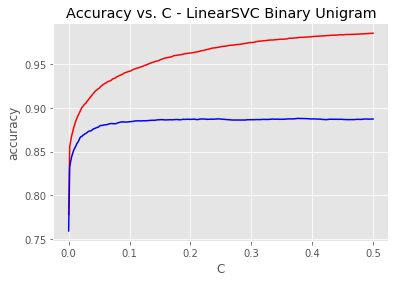

In [28]:
#unigram with binary = True
C_list = np.linspace(1e-5, 0.5, 300)
num_iterations = len(C_list)
best_score = 0
best_C = 0

valid_scores = []
train_scores = []

for C in C_list:
    clf = svm.LinearSVC(random_state=0, tol=1e-5, C = C)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_dev)
    score = metrics.accuracy_score(y_dev, y_pred)
    
    valid_scores.append(score)
    train_scores.append(metrics.accuracy_score(y_train, clf.predict(X_train)))
    
    if (best_score < score):
        best_score = score
        best_C = C
        
    print('Score: ' + str(score) + ' Current_Best: ' + str(best_score) + ' Left: ' + str(num_iterations))
    num_iterations -= 1
    
plt.plot(C_list, train_scores, 'r', label = 'train_accuracy')
plt.plot(C_list, valid_scores, 'b', label = 'valid_accuracy')
plt.ylabel('accuracy')
plt.style.use('ggplot')
plt.xlabel('C')
plt.title('Accuracy vs. C - LinearSVC Binary Unigram')
plt.savefig('(IMDB)LinearSVC Binary Unigram')

In [29]:
clf = svm.LinearSVC(random_state=0, tol=1e-5, C = best_C)
clf.fit(X_final_train, y_final_train)
y_pred = clf.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print(score)

0.88332


Score: 0.7119 Current_Best: 0.7119 Left: 300
Score: 0.816 Current_Best: 0.816 Left: 299
Score: 0.8245 Current_Best: 0.8245 Left: 298
Score: 0.832 Current_Best: 0.832 Left: 297
Score: 0.8386 Current_Best: 0.8386 Left: 296
Score: 0.846 Current_Best: 0.846 Left: 295
Score: 0.8511 Current_Best: 0.8511 Left: 294
Score: 0.8548 Current_Best: 0.8548 Left: 293
Score: 0.8575 Current_Best: 0.8575 Left: 292
Score: 0.8595 Current_Best: 0.8595 Left: 291
Score: 0.8615 Current_Best: 0.8615 Left: 290
Score: 0.8636 Current_Best: 0.8636 Left: 289
Score: 0.866 Current_Best: 0.866 Left: 288
Score: 0.8669 Current_Best: 0.8669 Left: 287
Score: 0.8682 Current_Best: 0.8682 Left: 286
Score: 0.8692 Current_Best: 0.8692 Left: 285
Score: 0.8703 Current_Best: 0.8703 Left: 284
Score: 0.871 Current_Best: 0.871 Left: 283
Score: 0.8718 Current_Best: 0.8718 Left: 282
Score: 0.8733 Current_Best: 0.8733 Left: 281
Score: 0.8742 Current_Best: 0.8742 Left: 280
Score: 0.875 Current_Best: 0.875 Left: 279
Score: 0.876 Current_B

Score: 0.8923 Current_Best: 0.8932 Left: 116
Score: 0.8922 Current_Best: 0.8932 Left: 115
Score: 0.8921 Current_Best: 0.8932 Left: 114
Score: 0.8921 Current_Best: 0.8932 Left: 113
Score: 0.892 Current_Best: 0.8932 Left: 112
Score: 0.8921 Current_Best: 0.8932 Left: 111
Score: 0.892 Current_Best: 0.8932 Left: 110
Score: 0.8921 Current_Best: 0.8932 Left: 109
Score: 0.8921 Current_Best: 0.8932 Left: 108
Score: 0.8921 Current_Best: 0.8932 Left: 107
Score: 0.8921 Current_Best: 0.8932 Left: 106
Score: 0.8921 Current_Best: 0.8932 Left: 105
Score: 0.8921 Current_Best: 0.8932 Left: 104
Score: 0.8923 Current_Best: 0.8932 Left: 103
Score: 0.8924 Current_Best: 0.8932 Left: 102
Score: 0.8924 Current_Best: 0.8932 Left: 101
Score: 0.8926 Current_Best: 0.8932 Left: 100
Score: 0.8925 Current_Best: 0.8932 Left: 99
Score: 0.8925 Current_Best: 0.8932 Left: 98
Score: 0.8926 Current_Best: 0.8932 Left: 97
Score: 0.8926 Current_Best: 0.8932 Left: 96
Score: 0.8926 Current_Best: 0.8932 Left: 95
Score: 0.8926 Cur

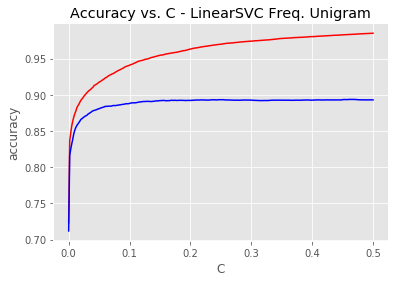

In [92]:
#unigram with binary = False
C_list = np.linspace(1e-5, 0.5, 300)
num_iterations = len(C_list)
best_score = 0
best_C = 0
valid_scores = []
train_scores = []

for C in C_list:
    clf = svm.LinearSVC(random_state=0, tol=1e-5, C = C)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_dev)
    score = metrics.accuracy_score(y_dev, y_pred)
    
    valid_scores.append(score)
    train_scores.append(metrics.accuracy_score(y_train, clf.predict(X_train)))
    
    if (best_score < score):
        best_score = score
        best_C = C
        
    print('Score: ' + str(score) + ' Current_Best: ' + str(best_score) + ' Left: ' + str(num_iterations))
    num_iterations -= 1
    
plt.plot(C_list, train_scores, 'r', label = 'train_accuracy')
plt.plot(C_list, valid_scores, 'b', label = 'valid_accuracy')
plt.ylabel('accuracy')
plt.style.use('ggplot')
plt.xlabel('C')
plt.title('Accuracy vs. C - LinearSVC Freq. Unigram')
plt.savefig('(IMDB)LinearSVC Binary Unigram')

In [93]:
clf = svm.LinearSVC(random_state=0, tol=1e-5, C = best_C)
clf.fit(X_final_train, y_final_train)
print(best_C)
y_pred = clf.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print(score)

0.46655585284280937
0.88372


Score: 0.8252 Current_Best: 0.8252 Left: 500
Score: 0.8297 Current_Best: 0.8297 Left: 499
Score: 0.8346 Current_Best: 0.8346 Left: 498
Score: 0.8371 Current_Best: 0.8371 Left: 497
Score: 0.8398 Current_Best: 0.8398 Left: 496
Score: 0.843 Current_Best: 0.843 Left: 495
Score: 0.8456 Current_Best: 0.8456 Left: 494
Score: 0.8485 Current_Best: 0.8485 Left: 493
Score: 0.8508 Current_Best: 0.8508 Left: 492
Score: 0.8534 Current_Best: 0.8534 Left: 491
Score: 0.8547 Current_Best: 0.8547 Left: 490
Score: 0.8562 Current_Best: 0.8562 Left: 489
Score: 0.8583 Current_Best: 0.8583 Left: 488
Score: 0.86 Current_Best: 0.86 Left: 487
Score: 0.8613 Current_Best: 0.8613 Left: 486
Score: 0.8629 Current_Best: 0.8629 Left: 485
Score: 0.8647 Current_Best: 0.8647 Left: 484
Score: 0.8663 Current_Best: 0.8663 Left: 483
Score: 0.8676 Current_Best: 0.8676 Left: 482
Score: 0.868 Current_Best: 0.868 Left: 481
Score: 0.8688 Current_Best: 0.8688 Left: 480
Score: 0.8698 Current_Best: 0.8698 Left: 479
Score: 0.8703 Curr

Score: 0.8979 Current_Best: 0.8979 Left: 316
Score: 0.898 Current_Best: 0.898 Left: 315
Score: 0.8981 Current_Best: 0.8981 Left: 314
Score: 0.8982 Current_Best: 0.8982 Left: 313
Score: 0.8982 Current_Best: 0.8982 Left: 312
Score: 0.8982 Current_Best: 0.8982 Left: 311
Score: 0.8983 Current_Best: 0.8983 Left: 310
Score: 0.8983 Current_Best: 0.8983 Left: 309
Score: 0.8984 Current_Best: 0.8984 Left: 308
Score: 0.8984 Current_Best: 0.8984 Left: 307
Score: 0.8984 Current_Best: 0.8984 Left: 306
Score: 0.8984 Current_Best: 0.8984 Left: 305
Score: 0.8985 Current_Best: 0.8985 Left: 304
Score: 0.8987 Current_Best: 0.8987 Left: 303
Score: 0.8987 Current_Best: 0.8987 Left: 302
Score: 0.8987 Current_Best: 0.8987 Left: 301
Score: 0.8987 Current_Best: 0.8987 Left: 300
Score: 0.8987 Current_Best: 0.8987 Left: 299
Score: 0.8986 Current_Best: 0.8987 Left: 298
Score: 0.8986 Current_Best: 0.8987 Left: 297
Score: 0.8986 Current_Best: 0.8987 Left: 296
Score: 0.8986 Current_Best: 0.8987 Left: 295
Score: 0.898

Score: 0.9019 Current_Best: 0.9019 Left: 131
Score: 0.9019 Current_Best: 0.9019 Left: 130
Score: 0.9018 Current_Best: 0.9019 Left: 129
Score: 0.9018 Current_Best: 0.9019 Left: 128
Score: 0.9018 Current_Best: 0.9019 Left: 127
Score: 0.9018 Current_Best: 0.9019 Left: 126
Score: 0.9019 Current_Best: 0.9019 Left: 125
Score: 0.9019 Current_Best: 0.9019 Left: 124
Score: 0.9019 Current_Best: 0.9019 Left: 123
Score: 0.9019 Current_Best: 0.9019 Left: 122
Score: 0.9019 Current_Best: 0.9019 Left: 121
Score: 0.9019 Current_Best: 0.9019 Left: 120
Score: 0.9019 Current_Best: 0.9019 Left: 119
Score: 0.9019 Current_Best: 0.9019 Left: 118
Score: 0.9019 Current_Best: 0.9019 Left: 117
Score: 0.9019 Current_Best: 0.9019 Left: 116
Score: 0.9019 Current_Best: 0.9019 Left: 115
Score: 0.9019 Current_Best: 0.9019 Left: 114
Score: 0.902 Current_Best: 0.902 Left: 113
Score: 0.902 Current_Best: 0.902 Left: 112
Score: 0.902 Current_Best: 0.902 Left: 111
Score: 0.902 Current_Best: 0.902 Left: 110
Score: 0.902 Curre

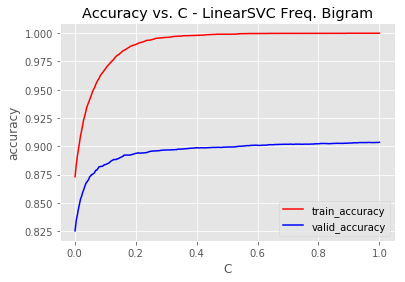

In [87]:
#bigram with binary = False
C_list = np.linspace(1e-3, 1, 500)
num_iterations = len(C_list)
best_score = 0
best_C = 0
valid_scores = []
train_scores = []

for C in C_list:
    clf = svm.LinearSVC(random_state=0, tol=1e-5, C = C)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_dev)
    score = metrics.accuracy_score(y_dev, y_pred)
    
    valid_scores.append(score)
    train_scores.append(metrics.accuracy_score(y_train, clf.predict(X_train)))
    
    if (best_score < score):
        best_score = score
        best_C = C
        
    print('Score: ' + str(score) + ' Current_Best: ' + str(best_score) + ' Left: ' + str(num_iterations))
    num_iterations -= 1
    
plt.plot(C_list, train_scores, 'r', label = 'train_accuracy')
plt.plot(C_list, valid_scores, 'b', label = 'valid_accuracy')
plt.ylabel('accuracy')
plt.style.use('ggplot')
plt.xlabel('C')
plt.title('Accuracy vs. C - LinearSVC Freq. Bigram')
plt.legend(loc='lower right')
plt.savefig('(IMDB)LinearSVC Freq, Bigram')

In [88]:
clf = svm.LinearSVC(random_state=0, tol=1e-5, C = best_C)
clf.fit(X_final_train, y_final_train)
print(best_C)
y_pred = clf.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print(score)

1.0
0.90628


Score: 0.7989 Current_Best: 0.7989 Left: 500
Score: 0.8452 Current_Best: 0.8452 Left: 499
Score: 0.8488 Current_Best: 0.8488 Left: 498
Score: 0.8521 Current_Best: 0.8521 Left: 497
Score: 0.8535 Current_Best: 0.8535 Left: 496
Score: 0.8551 Current_Best: 0.8551 Left: 495
Score: 0.8553 Current_Best: 0.8553 Left: 494
Score: 0.8562 Current_Best: 0.8562 Left: 493
Score: 0.8558 Current_Best: 0.8562 Left: 492
Score: 0.8568 Current_Best: 0.8568 Left: 491
Score: 0.8579 Current_Best: 0.8579 Left: 490
Score: 0.8582 Current_Best: 0.8582 Left: 489
Score: 0.8585 Current_Best: 0.8585 Left: 488
Score: 0.859 Current_Best: 0.859 Left: 487
Score: 0.8593 Current_Best: 0.8593 Left: 486
Score: 0.8595 Current_Best: 0.8595 Left: 485
Score: 0.86 Current_Best: 0.86 Left: 484
Score: 0.8598 Current_Best: 0.86 Left: 483
Score: 0.8598 Current_Best: 0.86 Left: 482
Score: 0.8602 Current_Best: 0.8602 Left: 481
Score: 0.8608 Current_Best: 0.8608 Left: 480
Score: 0.8613 Current_Best: 0.8613 Left: 479
Score: 0.8613 Curren

Score: 0.8625 Current_Best: 0.864 Left: 313
Score: 0.8625 Current_Best: 0.864 Left: 312
Score: 0.8624 Current_Best: 0.864 Left: 311
Score: 0.8624 Current_Best: 0.864 Left: 310
Score: 0.8625 Current_Best: 0.864 Left: 309
Score: 0.8626 Current_Best: 0.864 Left: 308
Score: 0.8625 Current_Best: 0.864 Left: 307
Score: 0.8621 Current_Best: 0.864 Left: 306
Score: 0.8621 Current_Best: 0.864 Left: 305
Score: 0.8621 Current_Best: 0.864 Left: 304
Score: 0.862 Current_Best: 0.864 Left: 303
Score: 0.8619 Current_Best: 0.864 Left: 302
Score: 0.862 Current_Best: 0.864 Left: 301
Score: 0.862 Current_Best: 0.864 Left: 300
Score: 0.862 Current_Best: 0.864 Left: 299
Score: 0.8618 Current_Best: 0.864 Left: 298
Score: 0.8618 Current_Best: 0.864 Left: 297
Score: 0.8616 Current_Best: 0.864 Left: 296
Score: 0.8615 Current_Best: 0.864 Left: 295
Score: 0.8615 Current_Best: 0.864 Left: 294
Score: 0.8615 Current_Best: 0.864 Left: 293
Score: 0.8615 Current_Best: 0.864 Left: 292
Score: 0.8616 Current_Best: 0.864 Le

Score: 0.8579 Current_Best: 0.864 Left: 126
Score: 0.8579 Current_Best: 0.864 Left: 125
Score: 0.8579 Current_Best: 0.864 Left: 124
Score: 0.8579 Current_Best: 0.864 Left: 123
Score: 0.8579 Current_Best: 0.864 Left: 122
Score: 0.8579 Current_Best: 0.864 Left: 121
Score: 0.8578 Current_Best: 0.864 Left: 120
Score: 0.8579 Current_Best: 0.864 Left: 119
Score: 0.8579 Current_Best: 0.864 Left: 118
Score: 0.8579 Current_Best: 0.864 Left: 117
Score: 0.8578 Current_Best: 0.864 Left: 116
Score: 0.8577 Current_Best: 0.864 Left: 115
Score: 0.8577 Current_Best: 0.864 Left: 114
Score: 0.8577 Current_Best: 0.864 Left: 113
Score: 0.8577 Current_Best: 0.864 Left: 112
Score: 0.8575 Current_Best: 0.864 Left: 111
Score: 0.8577 Current_Best: 0.864 Left: 110
Score: 0.858 Current_Best: 0.864 Left: 109
Score: 0.858 Current_Best: 0.864 Left: 108
Score: 0.8579 Current_Best: 0.864 Left: 107
Score: 0.8579 Current_Best: 0.864 Left: 106
Score: 0.8577 Current_Best: 0.864 Left: 105
Score: 0.8577 Current_Best: 0.864 

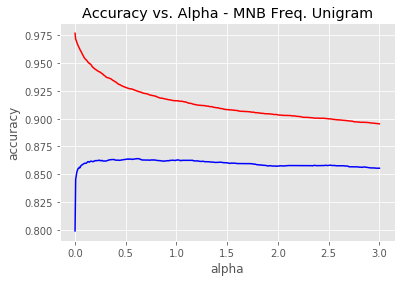

In [77]:
#unigram with binary = False
alpha_list = np.linspace(1e-5, 3, 500)
num_iterations = len(alpha_list)
best_score = 0
best_alpha = 0
valid_scores = []
train_scores = []

for alpha in alpha_list:
    clf = MultinomialNB(alpha = alpha)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_dev)
    score = metrics.accuracy_score(y_dev, y_pred)
    
    valid_scores.append(score)
    train_scores.append(metrics.accuracy_score(y_train, clf.predict(X_train)))
    
    if (best_score < score):
        best_score = score
        best_alpha = alpha
        
    print('Score: ' + str(score) + ' Current_Best: ' + str(best_score) + ' Left: ' + str(num_iterations))
    num_iterations -= 1
    
plt.plot(alpha_list, train_scores, 'r', label = 'train_accuracy')
plt.plot(alpha_list, valid_scores, 'b', label = 'valid_accuracy')
plt.ylabel('accuracy')
plt.style.use('ggplot')
plt.xlabel('alpha')
plt.title('Accuracy vs. Alpha - MNB Freq. Unigram')
plt.savefig('(IMDB)MNB Freq. Unigram.png')

In [78]:
clf = MultinomialNB(alpha = best_alpha)
print(best_alpha)
clf.fit(X_final_train, y_final_train)
y_pred = clf.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print(score)

0.6072224048096192
0.82984


Score: 0.8513 Current_Best: 0.8513 Left: 500
Score: 0.8727 Current_Best: 0.8727 Left: 499
Score: 0.8775 Current_Best: 0.8775 Left: 498
Score: 0.8791 Current_Best: 0.8791 Left: 497
Score: 0.8805 Current_Best: 0.8805 Left: 496
Score: 0.8828 Current_Best: 0.8828 Left: 495
Score: 0.8839 Current_Best: 0.8839 Left: 494
Score: 0.8847 Current_Best: 0.8847 Left: 493
Score: 0.8849 Current_Best: 0.8849 Left: 492
Score: 0.8849 Current_Best: 0.8849 Left: 491
Score: 0.8851 Current_Best: 0.8851 Left: 490
Score: 0.8856 Current_Best: 0.8856 Left: 489
Score: 0.8854 Current_Best: 0.8856 Left: 488
Score: 0.8851 Current_Best: 0.8856 Left: 487
Score: 0.8854 Current_Best: 0.8856 Left: 486
Score: 0.8856 Current_Best: 0.8856 Left: 485
Score: 0.8851 Current_Best: 0.8856 Left: 484
Score: 0.8853 Current_Best: 0.8856 Left: 483
Score: 0.8857 Current_Best: 0.8857 Left: 482
Score: 0.8861 Current_Best: 0.8861 Left: 481
Score: 0.8865 Current_Best: 0.8865 Left: 480
Score: 0.8866 Current_Best: 0.8866 Left: 479
Score: 0.8

Score: 0.8867 Current_Best: 0.8882 Left: 317
Score: 0.8867 Current_Best: 0.8882 Left: 316
Score: 0.8866 Current_Best: 0.8882 Left: 315
Score: 0.8866 Current_Best: 0.8882 Left: 314
Score: 0.8865 Current_Best: 0.8882 Left: 313
Score: 0.8866 Current_Best: 0.8882 Left: 312
Score: 0.8866 Current_Best: 0.8882 Left: 311
Score: 0.8865 Current_Best: 0.8882 Left: 310
Score: 0.8866 Current_Best: 0.8882 Left: 309
Score: 0.8865 Current_Best: 0.8882 Left: 308
Score: 0.8866 Current_Best: 0.8882 Left: 307
Score: 0.8865 Current_Best: 0.8882 Left: 306
Score: 0.8864 Current_Best: 0.8882 Left: 305
Score: 0.8864 Current_Best: 0.8882 Left: 304
Score: 0.8863 Current_Best: 0.8882 Left: 303
Score: 0.8863 Current_Best: 0.8882 Left: 302
Score: 0.8863 Current_Best: 0.8882 Left: 301
Score: 0.8862 Current_Best: 0.8882 Left: 300
Score: 0.8862 Current_Best: 0.8882 Left: 299
Score: 0.8862 Current_Best: 0.8882 Left: 298
Score: 0.8862 Current_Best: 0.8882 Left: 297
Score: 0.8863 Current_Best: 0.8882 Left: 296
Score: 0.8

Score: 0.8842 Current_Best: 0.8882 Left: 134
Score: 0.8842 Current_Best: 0.8882 Left: 133
Score: 0.8842 Current_Best: 0.8882 Left: 132
Score: 0.8842 Current_Best: 0.8882 Left: 131
Score: 0.8842 Current_Best: 0.8882 Left: 130
Score: 0.8842 Current_Best: 0.8882 Left: 129
Score: 0.8843 Current_Best: 0.8882 Left: 128
Score: 0.8843 Current_Best: 0.8882 Left: 127
Score: 0.8842 Current_Best: 0.8882 Left: 126
Score: 0.8842 Current_Best: 0.8882 Left: 125
Score: 0.8842 Current_Best: 0.8882 Left: 124
Score: 0.8842 Current_Best: 0.8882 Left: 123
Score: 0.8842 Current_Best: 0.8882 Left: 122
Score: 0.8842 Current_Best: 0.8882 Left: 121
Score: 0.8842 Current_Best: 0.8882 Left: 120
Score: 0.8841 Current_Best: 0.8882 Left: 119
Score: 0.8841 Current_Best: 0.8882 Left: 118
Score: 0.8842 Current_Best: 0.8882 Left: 117
Score: 0.8841 Current_Best: 0.8882 Left: 116
Score: 0.8841 Current_Best: 0.8882 Left: 115
Score: 0.8841 Current_Best: 0.8882 Left: 114
Score: 0.8841 Current_Best: 0.8882 Left: 113
Score: 0.8

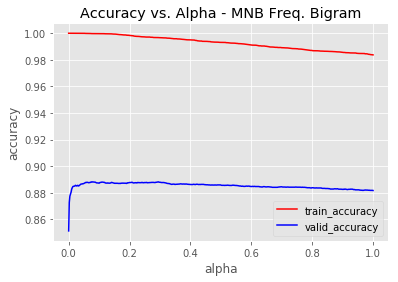

In [85]:
#bigram with binary = False
alpha_list = np.linspace(1e-5, 1, 500)
num_iterations = len(alpha_list)
best_score = 0
best_alpha = 0
valid_scores = []
train_scores = []

for alpha in alpha_list:
    clf = MultinomialNB(alpha = alpha)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_dev)
    score = metrics.accuracy_score(y_dev, y_pred)
   
    valid_scores.append(score)
    train_scores.append(metrics.accuracy_score(y_train, clf.predict(X_train)))
    
    if (best_score < score):
        best_score = score
        best_alpha = alpha
        
    print('Score: ' + str(score) + ' Current_Best: ' + str(best_score) + ' Left: ' + str(num_iterations))
    num_iterations -= 1
    
plt.plot(alpha_list, train_scores, 'r', label = 'train_accuracy')
plt.plot(alpha_list, valid_scores, 'b', label = 'valid_accuracy')
plt.ylabel('accuracy')
plt.style.use('ggplot')
plt.xlabel('alpha')
plt.title('Accuracy vs. Alpha - MNB Freq. Bigram')
plt.legend(loc='lower right')
plt.savefig('(IMDB)MNB Freq. Bigram.png')

In [86]:
clf = MultinomialNB(alpha = best_alpha)
clf.fit(X_final_train, y_final_train)
print(best_alpha)
y_pred = clf.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print(score)

0.07415755511022044
0.869
